In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import time

In [3]:
import importlib
import os.path

### Construct a data frame containing all training data sequences and combine with target probability distribution into one dataframe

In [4]:
root = 'data/train'
file_paths = os.listdir(root)
rel_file_paths = [os.path.join(root, x) for x in file_paths]

In [5]:
rel_file_paths[1]

'data/train\\00001'

In [6]:
training_sequences = []

for i in range(1,len(rel_file_paths)):
    sequence = pd.read_csv(rel_file_paths[i]+'/columns_1000ms.csv')
    sequence_targets =  pd.read_csv(rel_file_paths[i]+'/targets.csv')
    
    if sequence.shape[0] == sequence_targets.shape[0]:
        sequence_complete = pd.concat([sequence , sequence_targets] , axis = 1)
        sequence_final = sequence_complete.dropna(subset=sequence_targets.columns) 
        deleted = ((sequence_complete.shape[0] - sequence_final.shape[0]) / sequence_complete.shape[0])*100
        print('sequence ' + str(rel_file_paths[i][-2:]) + ', ' + str(int(deleted)) + '% of rows deleted')
        training_sequences.append(sequence_final)
        
    else:
        print('Number of rows for sequence data and target do not match for sequence ' + str(rel_file_paths[i][-2:]))

sequence 01, 4% of rows deleted
sequence 02, 2% of rows deleted
sequence 03, 5% of rows deleted
sequence 04, 2% of rows deleted
sequence 05, 3% of rows deleted
sequence 06, 3% of rows deleted
sequence 07, 1% of rows deleted
sequence 08, 4% of rows deleted
sequence 09, 1% of rows deleted
sequence 10, 1% of rows deleted


In [7]:
training_data_full = pd.concat(training_sequences)
training_data_full

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1788,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1789,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1790,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


### Count the number of NANs per column

In [8]:
training_data_trimmed = training_data_full.copy()

In [9]:
na_vals_per_column = []
for col in training_data_full.columns[:366]:
    n = training_data_full[col].isna().sum()
    na_vals_per_column.append(n)

    if n > (len(training_data_full) / 2):
        #print(col)
        training_data_trimmed.drop(col , axis=1 , inplace=True)
        

Text(10.049999999999997, 0.5, 'Frequency')

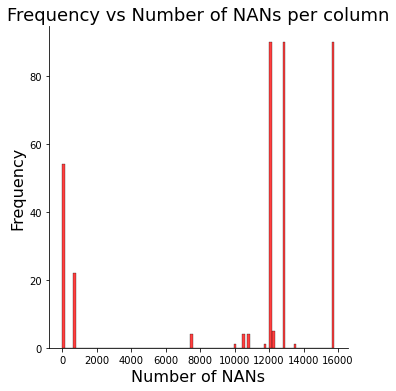

In [10]:
sns.displot(na_vals_per_column, kde=False, color='red', bins=100)
plt.title('Frequency vs Number of NANs per column', fontsize=18)
plt.xlabel('Number of NANs', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [11]:
training_data_trimmed.head()

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,p_stand,t_bend,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50


### Impute the missing values with their mean for now

In [12]:
for col in training_data_trimmed.columns:
    training_data_trimmed[col].fillna(training_data_trimmed[col].mean(), inplace = True) 

In [13]:
for col in training_data_trimmed.columns:
    if training_data_trimmed[col].isna().sum() > 0: 
        print('you have some nans left in the dataset mate')
        print(col)
    else: 
        pass
print('No nans remaining in the dataset')

No nans remaining in the dataset


In [14]:
#Drop the start and end columns 
try:
    training_data_trimmed.drop(['start' , 'end'] , axis=1 , inplace=True)
except KeyError:
    print('already removed')

In [15]:
#Test if there are any NANs in your pandas dataframe 
training_data_trimmed.isnull().values.any()

False

### Assess level of agreement for the annotators

In [16]:
target_cols = training_data_trimmed.columns[-20:]

In [17]:
targets = training_data_trimmed[target_cols].copy()
targets['maximum'] = targets.max(axis = 1)
targets['max_label'] =  targets.idxmax(axis=1)

In [18]:
targets

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,a_walk
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,a_walk
48,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.50,a_walk
49,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.55,p_stand
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.50,p_stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,p_stand
1788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,p_stand
1789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,p_stand
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,p_stand


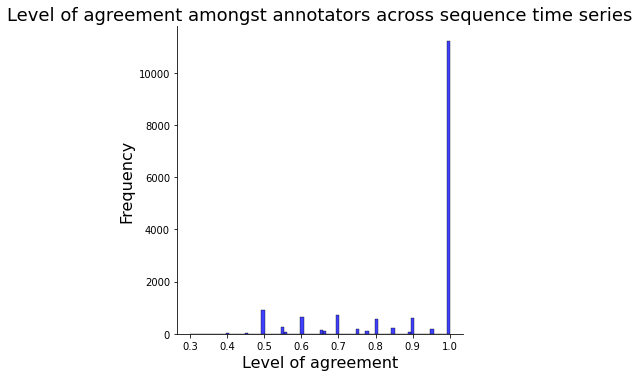

In [19]:
ax = sns.displot(targets['maximum'], kde=False, color='blue')
plt.title('Level of agreement amongst annotators across sequence time series', fontsize=18)
plt.xlabel('Level of agreement', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams['figure.figsize']=(30,30)


In [20]:
#generate a table to show percentage of datapoints with different max 
max_target_val = targets['maximum']

#Table values to be in range from 0.4 to 1
label_confidence = [i/100 for i in range(50,105,5)]

percentage_of_datapoints = []

for i in label_confidence:
    count = 0 
    for j in max_target_val: 
        if j >= i:
            count += 1 
    percentage_of_datapoints.append((count*100)/len(max_target_val))

In [21]:
label_confidence_df = pd.DataFrame(list(zip(label_confidence, percentage_of_datapoints)), columns =['label_confidence', 'percentage_of_datapoints'])

In [22]:
label_confidence_df

,label_confidence,percentage_of_datapoints
0,0.50,99.484600
1,0.55,93.833830
2,0.60,91.610780
3,0.65,87.586935
4,0.70,86.140089
5,0.75,81.718828
6,0.80,80.079483
7,0.85,76.440636
8,0.90,74.646051
9,0.95,70.833333


In [23]:
thresh = 0.6

labels = []
for index, row in targets.iterrows():
    if row['maximum'] <= thresh:
        labels.append(row['max_label'])
        
counts = []

for element in target_cols:
    counter = 0
    for l in labels:
        if element == l:
            counter +=1 
        else:
            pass
    counts.append(counter)

df_test = pd.DataFrame(list(zip(target_cols, counts)) , index = [i for i in range(len(counts))], columns = ['Activity Label', 'Count'])
df_test.sort_values(by=['Count'], ascending = False)

,Activity Label,Count
10,p_stand,460
4,a_walk,311
19,t_turn,214
5,p_bent,211
8,p_sit,183
7,p_lie,162
6,p_kneel,76
18,t_straighten,53
11,t_bend,52
15,t_sit_stand,51


#### Prepare training data : Adjusting the target label to be the maximum value activity and then encoding the labels

In [24]:
targets.head(2)

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a_walk
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a_walk


In [25]:
if 'max_label' in targets.columns:
    print('max labels already added')
else:
    targets['max_label'] =  targets.idxmax(axis=1)

max labels already added


In [26]:
targets.head(3)

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a_walk
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,a_walk
48,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,a_walk


In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [28]:
input_classes = ['a_ascend', 'a_descend', 'a_jump' , 'a_loadwalk' , 'a_walk', 'p_bent', 'p_kneel', 
 'p_lie', 'p_sit', 'p_squat', 'p_stand', 't_bend', 't_kneel_stand', 't_lie_sit' ,
't_sit_lie' , 't_sit_stand', 't_stand_kneel', 't_stand_sit', 't_straighten', 't_turn']

In [29]:
label_encoder.fit(input_classes)

LabelEncoder()

In [30]:
targets['max_label_encoded'] = label_encoder.transform(targets['max_label'])

In [31]:
targets['max_label_encoded'].describe()

count    16104.000000
mean         9.075882
std          3.873515
min          0.000000
25%          7.000000
50%         10.000000
75%         10.000000
max         19.000000
Name: max_label_encoded, dtype: float64

In [32]:
targets.head()

,a_ascend,a_descend,a_jump,a_loadwalk,a_walk,p_bent,p_kneel,p_lie,p_sit,p_squat,...,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label,max_label_encoded
46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,a_walk,4
47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,a_walk,4
48,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.50,a_walk,4
49,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.55,p_stand,10
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.50,p_stand,10


Twenty (posture/ambulation) activities labels are annotated in our dataset, and these are enumerated below together with short descriptions: 

1.	a_ascend: ascent stairs;
2.	a_descend: descent stairs;
3.	a_jump: jump;
4.	a_loadwalk: walk with load;
5.	a_walk: walk;
6.	p_bent: bending;
7.	p_kneel: kneeling;
8.	p_lie: lying;
9.	p_sit: sitting;
10.	p_squat: squatting;
11.	p_stand: standing;
12.	t_bend: stand-to-bend;
13.	t_kneel stand: kneel-to-stand;
14.	t_lie_sit: lie-to-sit;
15.	t_sit_lie: sit-to-lie;
16.	t_sit_stand: sit-to-stand;
17.	t_stand_kneel: stand-to-kneel;
18.	t_stand_sit: stand-to-sit;
19.	t_straighten: bend-to-stand; and
20.	t_turn: turn

The prefix ‘a_’ on a label indicates an ambulation activity (i.e. an activity requiring of continuing movement), the prefix ‘p_’ indicate static postures (i.e. times when the participants are stationary), and the prefix ‘t_’ indicate posture-to-posture transitions

### Split confident data 

In [33]:
## Generating dataframe that contains all features , aswell as max_target value and max_target encoded label 

training_data_frame = training_data_trimmed.copy()
training_data_frame['maximum'] = targets['maximum'].copy()
training_data_frame['max_label_encoded'] = targets['max_label_encoded'].copy()

In [34]:
training_data_frame.head()
#This is a dataframe with 82 features and two target columns , one with max target value and one with the maximum valued label (in encoded form)

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label_encoded
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,4
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,4
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.50,4
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.55,10
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.50,10


In [35]:
len(training_data_frame)

16104

In [36]:
#Check for any NANs in the dataframe
training_data_frame.isnull().sum().sum()

0

In [37]:
#Choose the rows with a confidence of 0.8 or higher for model training 
# This generates 3 dfs 1. All data , 2. Confident data , 3. Low confidence data 

In [38]:
confident_training_data = training_data_frame.copy()
confident_training_data = confident_training_data[confident_training_data.maximum >= 0.8]

low_confidence_data = training_data_frame.copy()
low_confidence_data = low_confidence_data[low_confidence_data.maximum < 0.8]


In [39]:
#Test that row counts are as expected 
l = len(low_confidence_data) 
h = len(confident_training_data)
m = len(training_data_frame)

if l+h == m: 
    print('row counts as expected')
else:
    print('unexpected row counts, potential error')


print(str(l) + ' ,' + str(h) +  ' ,' + str(m))

row counts as expected
3208 ,12896 ,16104


In [40]:
confident_training_data

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label_encoded
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
54,0.9452,0.031543,0.870,0.943,1.016,18.904,-0.2523,0.027388,-0.296,-0.249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
55,0.9436,0.011110,0.920,0.943,0.960,18.872,-0.2778,0.009652,-0.304,-0.276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
56,0.9424,0.011517,0.912,0.945,0.962,18.848,-0.2719,0.008282,-0.288,-0.271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1788,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1789,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10
1790,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10


In [41]:
#Check for any NANs in the dataframe
confident_training_data.isnull().sum().sum()

0

In [42]:
#Resetting the index on confident training data 
confident_training_data = confident_training_data.reset_index()
confident_training_data.drop(columns = 'index', inplace = True)

In [43]:
training_data_frame

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label_encoded
46,0.9668,0.112356,0.678,0.955,1.186,19.336,-0.4514,0.319798,-1.050,-0.321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,4
47,0.3769,0.404018,-0.228,0.376,1.660,7.538,-0.4088,0.362220,-1.064,-0.326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,4
48,0.6807,0.472910,-0.158,0.838,1.632,13.614,-0.3598,0.202494,-0.994,-0.350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.50,4
49,0.8571,0.109839,0.470,0.879,1.020,17.142,-0.4462,0.119504,-0.820,-0.428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.55,10
50,0.6775,0.233024,0.104,0.802,0.888,13.550,-0.6250,0.227178,-1.112,-0.538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.50,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.8691,0.006587,-0.882,-0.868,-0.858,-17.382,0.3636,0.006248,0.352,0.366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,10
1788,-0.8709,0.006913,-0.884,-0.868,-0.862,-17.418,0.3621,0.008955,0.344,0.365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,10
1789,-0.8668,0.010685,-0.890,-0.866,-0.848,-17.336,0.3586,0.011868,0.328,0.359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,10
1790,-0.8706,0.007800,-0.888,-0.869,-0.858,-17.412,0.3578,0.010157,0.328,0.358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,10


In [67]:
#Save the training data to a csv
training_data_frame.to_csv('training_data.csv')


## Implement an algorithm

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [45]:
#Ignore the 'confident' training data , do train test split on dataframe containing all data --> training_data_frame

In [46]:
train, test = train_test_split(training_data_frame, test_size=0.2)

In [47]:
test

,acceleration_x_mean,acceleration_x_std,acceleration_x_min,acceleration_x_median,acceleration_x_max,acceleration_x_sum,acceleration_y_mean,acceleration_y_std,acceleration_y_min,acceleration_y_median,...,t_kneel_stand,t_lie_sit,t_sit_lie,t_sit_stand,t_stand_kneel,t_stand_sit,t_straighten,t_turn,maximum,max_label_encoded
849,0.884400,0.025819,0.830,0.895,0.918,17.688,-0.230400,0.022879,-0.266,-0.232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,10
1677,0.213500,0.382345,-0.434,0.261,0.780,4.270,0.849600,0.318341,0.216,0.834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,5
1181,0.697700,0.009763,0.686,0.694,0.716,13.954,0.647900,0.014731,0.614,0.650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,5
86,-0.656400,0.208290,-1.088,-0.681,-0.340,-13.128,0.574900,0.173213,0.320,0.607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,4
1563,0.919500,0.051892,0.828,0.912,1.038,18.390,-0.314400,0.055673,-0.416,-0.320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.600000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.305200,0.027440,0.224,0.304,0.368,6.104,0.890200,0.150150,0.526,0.920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,8
737,0.082750,0.114486,-0.072,0.075,0.264,1.324,0.050375,0.084378,-0.090,0.040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,4
916,-0.617125,0.445902,-1.272,-0.692,0.376,-9.874,0.580875,0.367548,0.118,0.448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,5
645,0.084500,0.054107,-0.040,0.085,0.158,1.690,0.965500,0.044551,0.870,0.974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,10


In [48]:
model = DecisionTreeClassifier()

In [49]:
feature_cols = training_data_frame.columns[:80]

train_x = train[feature_cols].values
train_y = train['max_label_encoded'].values

test_x = test[feature_cols].values
test_y = test['max_label_encoded'].values

In [50]:
# Need to check the data for NANs because we are getting an error regarding NANS 
training_data_frame.isnull().values.any()

False

In [51]:
X = np.asanyarray(train_x)
y = np.asanyarray(train_y)
test_x = np.asanyarray(test_x)
test_y = np.asanyarray(test_y)
#y = np.ravel(y)

In [52]:
model.fit(X,y)

DecisionTreeClassifier()

### Generate Model predictions and transform to probability distribution format

In [53]:
y_pred = model.predict(test_x)

In [54]:
y_pred

array([10,  5, 15, ..., 10, 14, 11])

In [55]:
#Construct the prediction dataframe from the y_pred array, decode the label encoded value and contruct into 20 column array 
df_pred = pd.DataFrame(y_pred, columns = ['Prediction'])
df_pred['label'] = label_encoder.inverse_transform(df_pred['Prediction'])
df_pred = pd.concat([df_pred ,pd.get_dummies(df_pred['label'])], axis=1)
df_pred.drop(columns = ['Prediction', 'label'], inplace = True)

#Transform the dataframe into an array
df_y_pred = df_pred
pred_array = np.asanyarray(df_y_pred)

#Loop through the array to change 1 --> 0.9525 and 0 --> 0.0025 , this slightly amended distribution enables cross entropy loss to be calculated
pred_array = pred_array*0.9525
for i in range(len(pred_array)):
    for j in range(20):
        if pred_array[i][j] == 0:
            pred_array[i][j] = pred_array[i][j]+0.0025
        else:
            pass   

In [56]:
pred_array[0]

array([0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.9525, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025,
       0.0025, 0.0025, 0.0025, 0.0025])

In [57]:
#Generate the test array with true results to enable cross entropy loss to be calculated
df_y_test = test[test.columns[80:100]].reset_index(drop=True)
actual_array = np.asanyarray(df_y_test)

In [58]:
#Define a function to calculate the cross_entropy loss between two individual rows
def cross_entropy(actual, predicted):
    loss = -np.sum(actual*np.log(predicted))
    return loss

# Define function to calculate entropy of the actual distribution
def entropy(actual):
    ent = 0 
    for i in range(20):
        n = actual_array[0][i]
        if  n != 0:
            ent += -1*n*np.log(n)
        else:
            pass
    return ent


# Cross-Entropy = Entropy + KL Divergence 
# KL Divergence = Cross-Entropy - Entropy

#Define a function to calculate the KL divergence between two individual rows
def KL_divergence(actual, predicted):
    kl = cross_entropy(actual, predicted) - entropy(actual)
    return kl


#Define a function to calculate the Brier Score
def brier_score(actual_array, pred_array):
    class_weights = np.ones(20)
    total = 0 
    for i in range(len(actual_array)):
        row_score = 0
        for j in range(20):
            row_score += class_weights[j]*(actual_array[i][j]-pred_array[i][j])**2
        total+= row_score
    
    brier_score_final = total / len(actual_array)
    
    return brier_score_final   


In [59]:
#Check that the predicted results array length is the same as the actual results array length 
if len(actual_array) == len(pred_array):
    pass
else: 
    print('Array lengths differ, check you have the correct arrays for prediction / test')
    
#Loop through every row of predicted results and calculate the cross entropy loss 
total_loss = 0 
total_entropy = 0
total_kl = 0
for i in range(len(actual_array)):
    pred = pred_array[i]
    actual = actual_array[i]
    loss = cross_entropy(actual, pred)
    kl = KL_divergence(actual, pred)
    row_ent = entropy(actual)
    total_entropy += row_ent
    total_kl += kl
    total_loss += loss

average_loss = total_loss / len(pred_array)
average_entropy = total_entropy / len(pred_array)
average_kl = total_kl / len(pred_array)

print('KL divergence was calculated as: ' + str(average_kl))
print('Cross entropy loss was calculated as: ' + str(average_loss))
print('Entropy was calculated as: ' + str(total_entropy))

KL divergence was calculated as: 2.9794898632935656
Cross entropy loss was calculated as: 2.9794898632935656
Entropy was calculated as: 0.0


In [60]:
brier_score(actual_array, pred_array)     

0.8198977266789624

In [61]:
#Testing the distribution across all rows of test data and seeing what it looks like (concentrated distribution so average row entropy is close to 0)

counter = 0
for i in range(len(actual_array)):
    for j in range(20):
        if actual_array[i][j] ==1:
            counter+= 1
        else:
            pass
print(len(actual_array))
counter

3221


2240

#### Calculate the pseudo metrics on label encoded test data (test_y and y_pred)

In [62]:
import sklearn.metrics as skl

In [63]:
test_y

array([10,  5,  5, ...,  5, 10,  5])

In [64]:
y_pred

array([10,  5, 15, ..., 10, 14, 11])

In [65]:
Macro_F1 = skl.f1_score(test_y, y_pred , average = 'macro')
Macro_precision_score = skl.precision_score(test_y, y_pred , average = 'macro')
Macro_recall = skl.recall_score(test_y, y_pred , average = 'macro')


#Add error results to data frame
res = {'Model_Name': [model_name]'Macro_F1' : [Macro_F1]  ,'Macro_precision_score' : [Macro_precision_score] , 'Macro_recall': [Macro_recall]}
results = pd.DataFrame(data=res)

results

,Macro_F1,Macro_precision_score,Macro_recall
0,0.240194,0.233896,0.250676


In [ ]:
def generate_pseudo_scores(test_y_encoded , y_pred_encoded, model_name = 'Decision Tree' ):
    Macro_F1 = skl.f1_score(test_y_encoded, y_pred_encoded , average = 'macro')
    Macro_precision_score = skl.precision_score(test_y_encoded, y_pred_encoded , average = 'macro')
    Macro_recall = skl.recall_score(test_y_encoded, y_pred_encoded , average = 'macro')
    #Add error results to data frame
    res = {'Model_Name': [model_name]'Macro_F1' : [Macro_F1]  ,'Macro_precision_score' : [Macro_precision_score] , 'Macro_recall': [Macro_recall]}
    results = pd.DataFrame(data=res)
    
    return results
